### MONTE CARLO SIMULATION/ SHARP RATIO/ BETA CORRELATION

##### HEMANT THAPA

In [36]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
# import nalyst
warnings.filterwarnings("ignore")

#### FINANCIAL TECHNOLOGY

Monte Carlo simulation is a computational technique that uses random sampling to simulate and analyze complex systems. It is used to model the behavior of a system over time by simulating a large number of random outcomes, which can be used to estimate the probabilities of various outcomes occurring.

Monte Carlo simulation is widely used in finance, engineering, physics, and many other fields to model and analyze complex systems that are difficult or impossible to analyze analytically. In finance, Monte Carlo simulation is commonly used to simulate the behavior of stock prices and other financial assets, and to estimate the value of financial derivatives such as options.

The basic idea behind Monte Carlo simulation is to use random sampling to generate a large number of possible outcomes for a given system. Each outcome is generated by randomly selecting values for the system's input variables, based on their probability distributions. These random outcomes are then used to estimate the probability distribution of the system's output variables, which can be used to make predictions about the behavior of the system over time.

The accuracy of a Monte Carlo simulation depends on the number of random samples generated and the quality of the probability distributions used to generate the samples. As the number of samples increases, the accuracy of the simulation generally improves, but at the cost of increased computational time.

In [7]:
class MonteCarloSimulator:
    def __init__(self, symbol, start_date, end_date):
        self.symbol = symbol
        self.data = yf.download(symbol, start=start_date, end=end_date)['Adj Close']
        self.returns = np.log(1 + self.data.pct_change())
        self.mu = self.returns.mean()
        self.sigma = self.returns.std()
        
    def generate_paths(self, num_paths, num_days):
        T = num_days
        N = num_paths
        S0 = self.data.iloc[-1]
        dt = 1 / T
        
        paths = np.zeros((T, N))
        paths[0] = S0
        for t in range(1, T):
            drift = (self.mu - 0.5 * self.sigma ** 2) * dt
            diffusion = self.sigma * np.sqrt(dt) * np.random.normal(size=N)
            paths[t] = paths[t-1] * np.exp(drift + diffusion)
            
        return paths
    
    def plot_paths(self, num_paths, num_days):
        paths = self.generate_paths(num_paths, num_days)
        plt.style.use('dark_background')
        plt.figure(figsize=(15,6))
        plt.plot(paths)
        plt.xlabel('Trading Days')
        plt.ylabel('Stock Price')
        plt.title('Monte Carlo Simulation for ' + self.symbol)
        plt.grid(linestyle='--', color='gray', alpha=0.5)
        plt.show()

In [8]:
class MonteCarloSimulation:
    def __init__(self, stock_ticker):
        self.stock = yf.Ticker(stock_ticker).history(period="max")
        self.returns = self.stock['Close'].pct_change().dropna()
        
    def simulate_without_replacement(self, num_simulations):
        simulations = []
        for i in range(num_simulations):
            sim = np.random.choice(self.returns, size=len(self.returns), replace=False)
            simulations.append(sim)
        return simulations
    
    def simulate_with_replacement(self, num_simulations):
        simulations = []
        for i in range(num_simulations):
            sim = np.random.choice(self.returns, size=len(self.returns), replace=True)
            simulations.append(sim)
        return simulations
    
    def simulate_with_alterations(self, num_simulations):
        simulations = []
        for i in range(num_simulations):
            sim = np.array(self.returns)
            indices = np.random.choice(len(self.returns), int(len(self.returns) * 0.5), replace=False)
            for index in indices:
                sim[index] = sim[index] + 0.02
            simulations.append(sim)
        return simulations
    
    def calculate_cumulative_returns(self, simulations):
        cumulative_returns = []
        for sim in simulations:
            cumulative_return = (1 + sim).cumprod() - 1
            cumulative_returns.append(cumulative_return)
        return cumulative_returns
    
    def plot_cumulative_returns(self, cumulative_returns, title, color='black', linewidth=3):
        plt.figure(figsize=(16, 9))
        plt.grid(linestyle='--', color='gray', alpha=0.5)
        for cumulative_return in cumulative_returns:
            plt.plot(cumulative_return, alpha=0.5)
        plt.title(title)
        plt.xlabel('Time')
        plt.show()

In [9]:
class SharpRatio:
    def __init__(self, ticker):
        self.ticker = yf.Ticker(ticker)
        self.returns = self.ticker.history(period="max")['Close'].pct_change().dropna()
    
    def calculate_sharp_ratio(self, cumulative_returns):
        average_returns = np.mean(cumulative_returns, axis=1)
        risk_free_rate = 0.02
        sharp_ratios = (average_returns - risk_free_rate) / np.std(average_returns)
        return sharp_ratios
    
    def plot_sharp_ratio(self, sharp_ratios, title):
        plt.figure(figsize=(16, 9))
        plt.grid(linestyle='--', color='gray', alpha=0.5)
        plt.hist(sharp_ratios, bins=50, color='red', alpha=0.7)
        plt.title(title)
        plt.xlabel('Sharp Ratio')
        plt.show()

#### 1. MONTE CARLO SIMULATION U.K BANKS

#### Lloyds Banking Group Plc

[*********************100%***********************]  1 of 1 completed


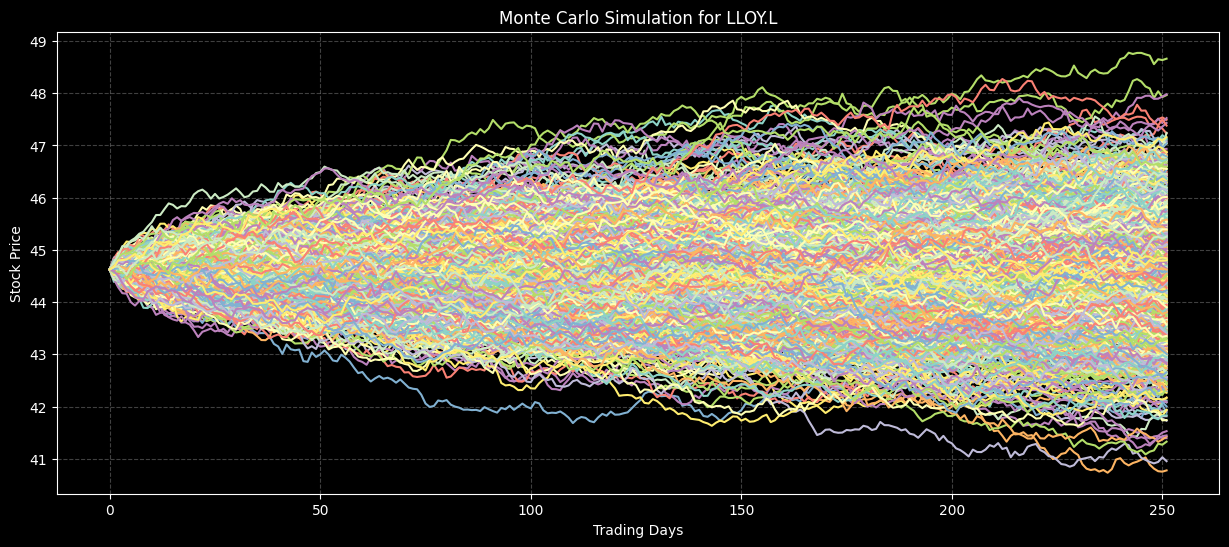

In [10]:
simulator = MonteCarloSimulator('LLOY.L', '2020-01-01', '2021-12-31')
simulator.plot_paths(num_paths=1000, num_days=252)

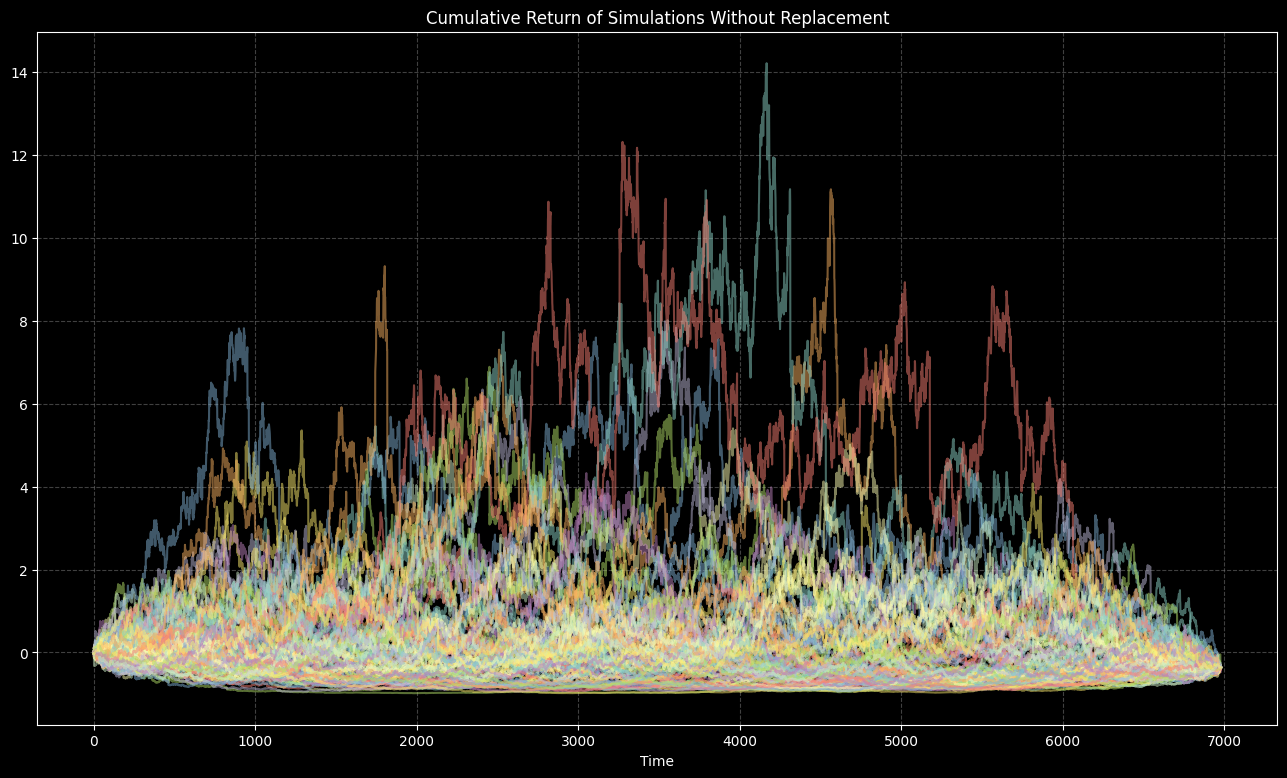

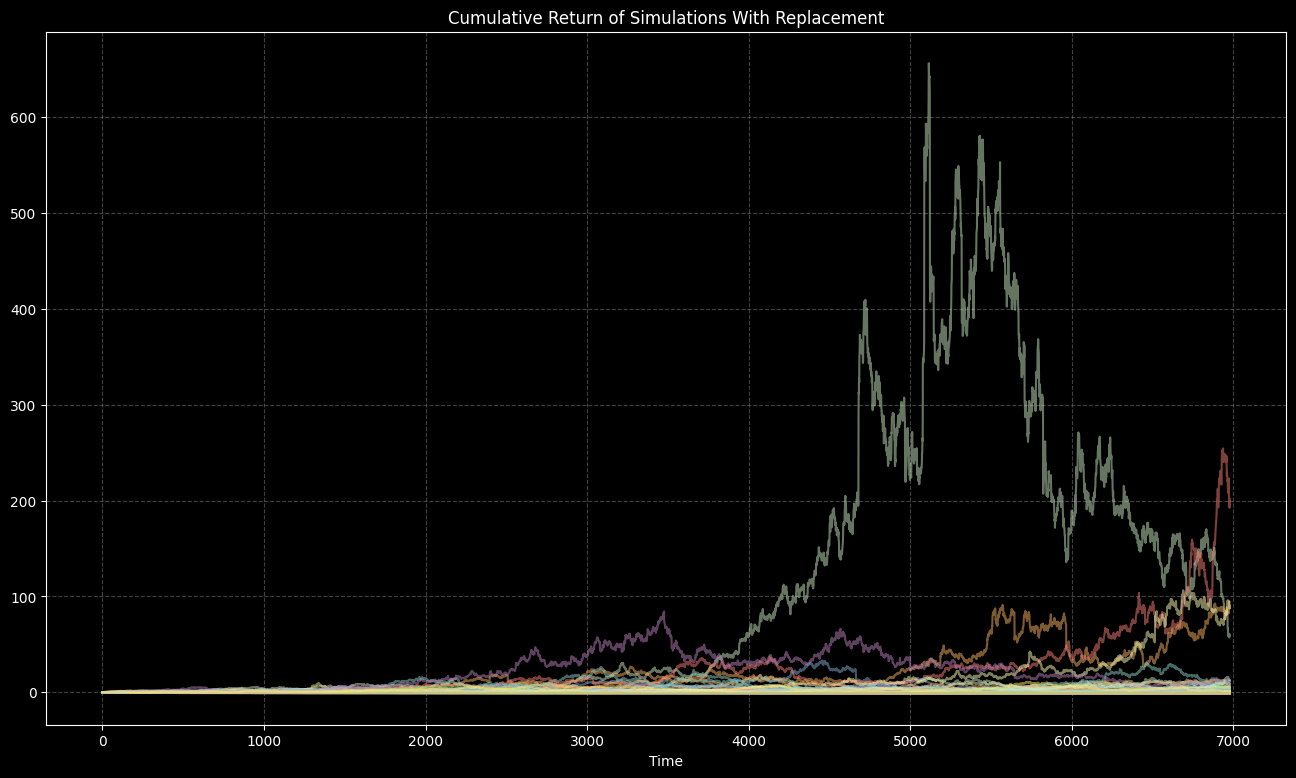

In [11]:
monte_carlo = MonteCarloSimulation("LLOY.L")
# Simulate the returns without replacement
simulations_without_replacement = monte_carlo.simulate_without_replacement(100)
cumulative_returns_without_replacement = monte_carlo.calculate_cumulative_returns(simulations_without_replacement)
monte_carlo.plot_cumulative_returns(cumulative_returns_without_replacement, 'Cumulative Return of Simulations Without Replacement')

# Simulate the returns with replacement
simulations_with_replacement = monte_carlo.simulate_with_replacement(100)
cumulative_returns_with_replacement = monte_carlo.calculate_cumulative_returns(simulations_with_replacement)
monte_carlo.plot_cumulative_returns(cumulative_returns_with_replacement, 'Cumulative Return of Simulations With Replacement')

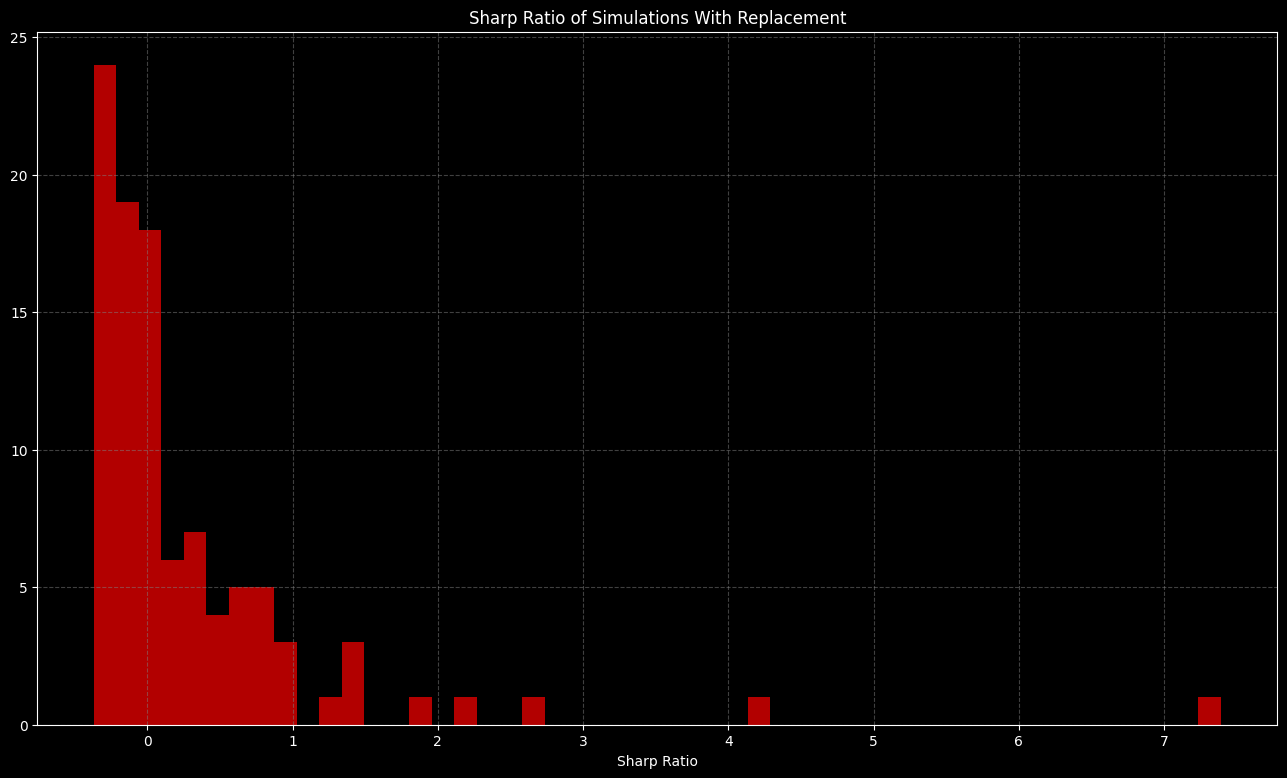

In [12]:
sharp_ratio = SharpRatio("LLOY.L")

# Simulate the returns with replacement
simulations_with_replacement = monte_carlo.simulate_with_replacement(100)
cumulative_returns_with_replacement = monte_carlo.calculate_cumulative_returns(simulations_with_replacement)

# Calculate the sharp ratio
sharp_ratios = sharp_ratio.calculate_sharp_ratio(cumulative_returns_with_replacement)
sharp_ratio.plot_sharp_ratio(sharp_ratios, 'Sharp Ratio of Simulations With Replacement')

#### BARCLAYS PLC 

[*********************100%***********************]  1 of 1 completed


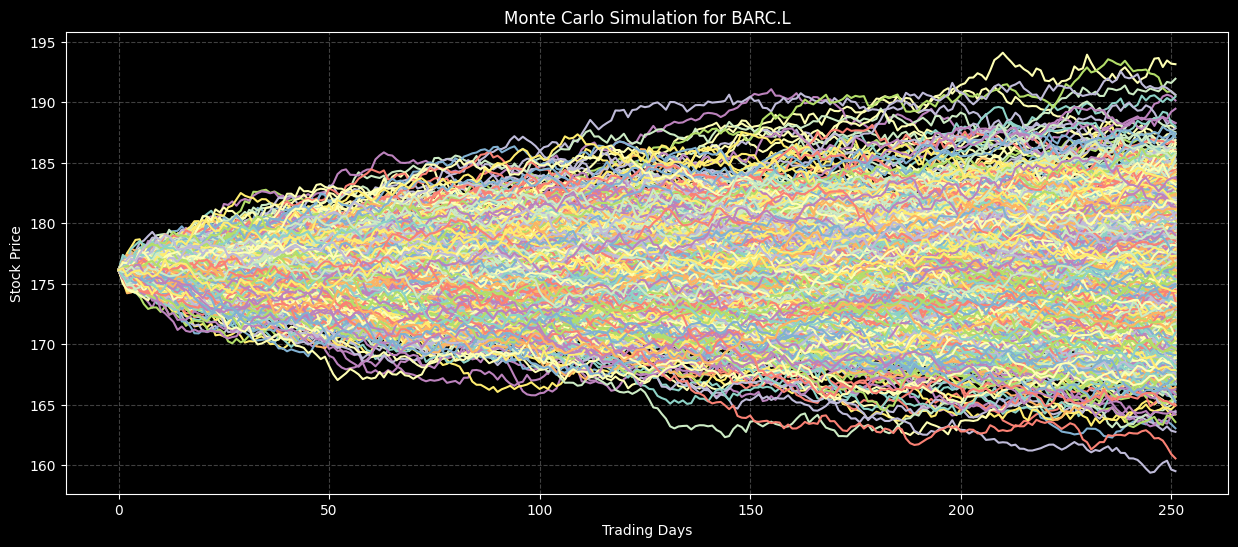

In [13]:
simulator = MonteCarloSimulator('BARC.L', '2020-01-01', '2021-12-31')
simulator.plot_paths(num_paths=1000, num_days=252)

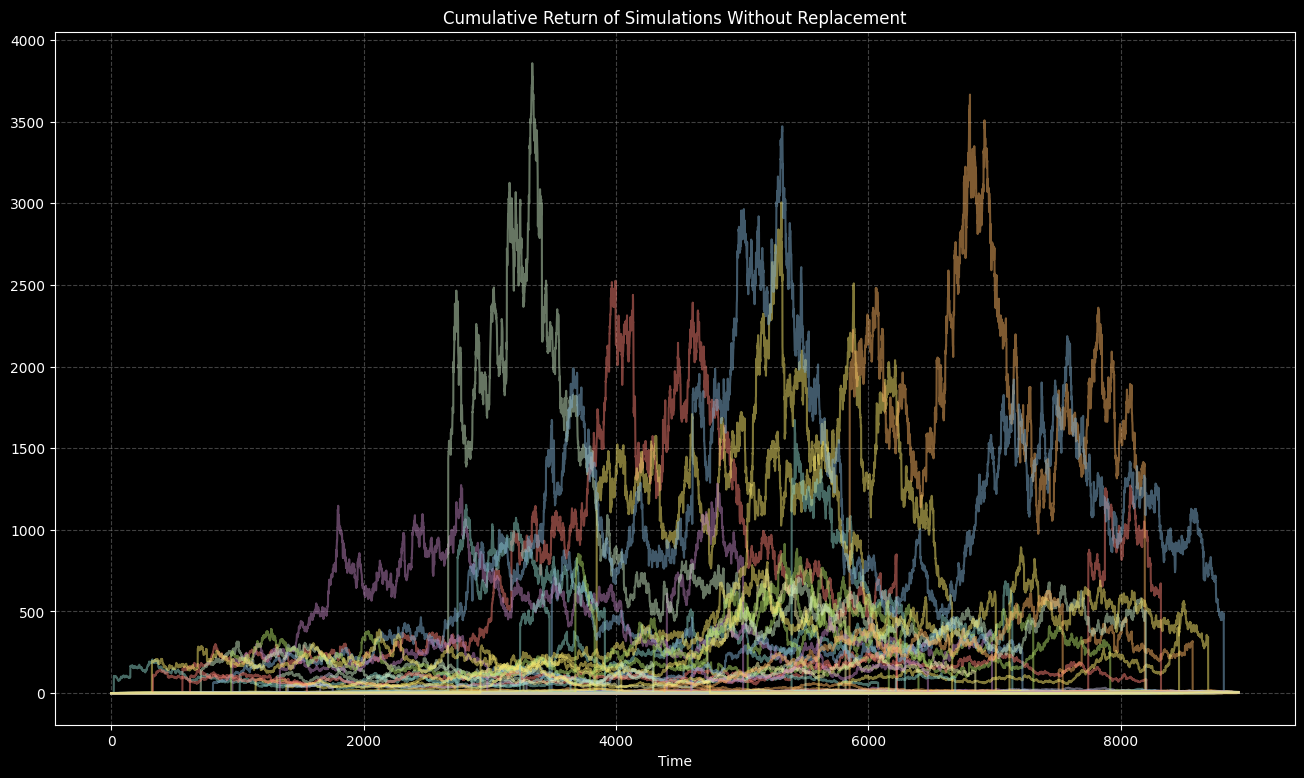

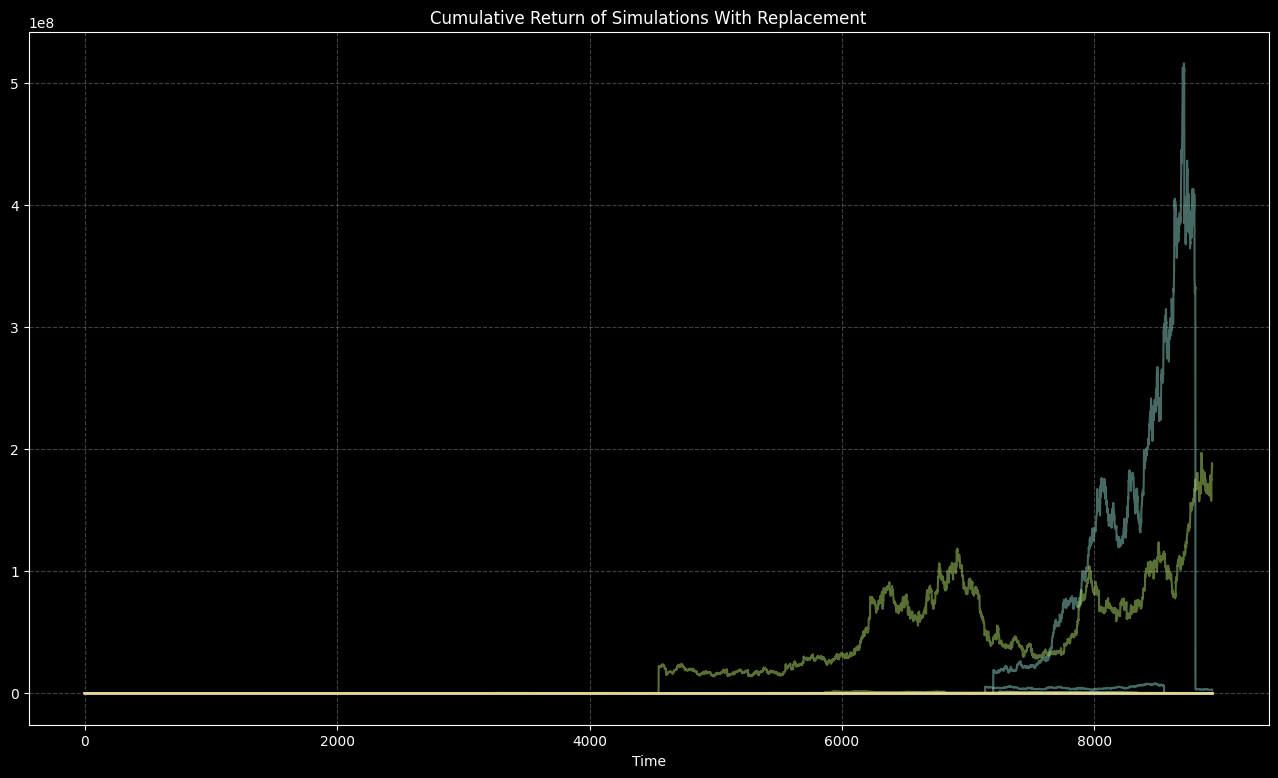

In [14]:
monte_carlo = MonteCarloSimulation("BARC.L")
# Simulate the returns without replacement
simulations_without_replacement = monte_carlo.simulate_without_replacement(100)
cumulative_returns_without_replacement = monte_carlo.calculate_cumulative_returns(simulations_without_replacement)
monte_carlo.plot_cumulative_returns(cumulative_returns_without_replacement, 'Cumulative Return of Simulations Without Replacement')

# Simulate the returns with replacement
simulations_with_replacement = monte_carlo.simulate_with_replacement(100)
cumulative_returns_with_replacement = monte_carlo.calculate_cumulative_returns(simulations_with_replacement)
monte_carlo.plot_cumulative_returns(cumulative_returns_with_replacement, 'Cumulative Return of Simulations With Replacement')

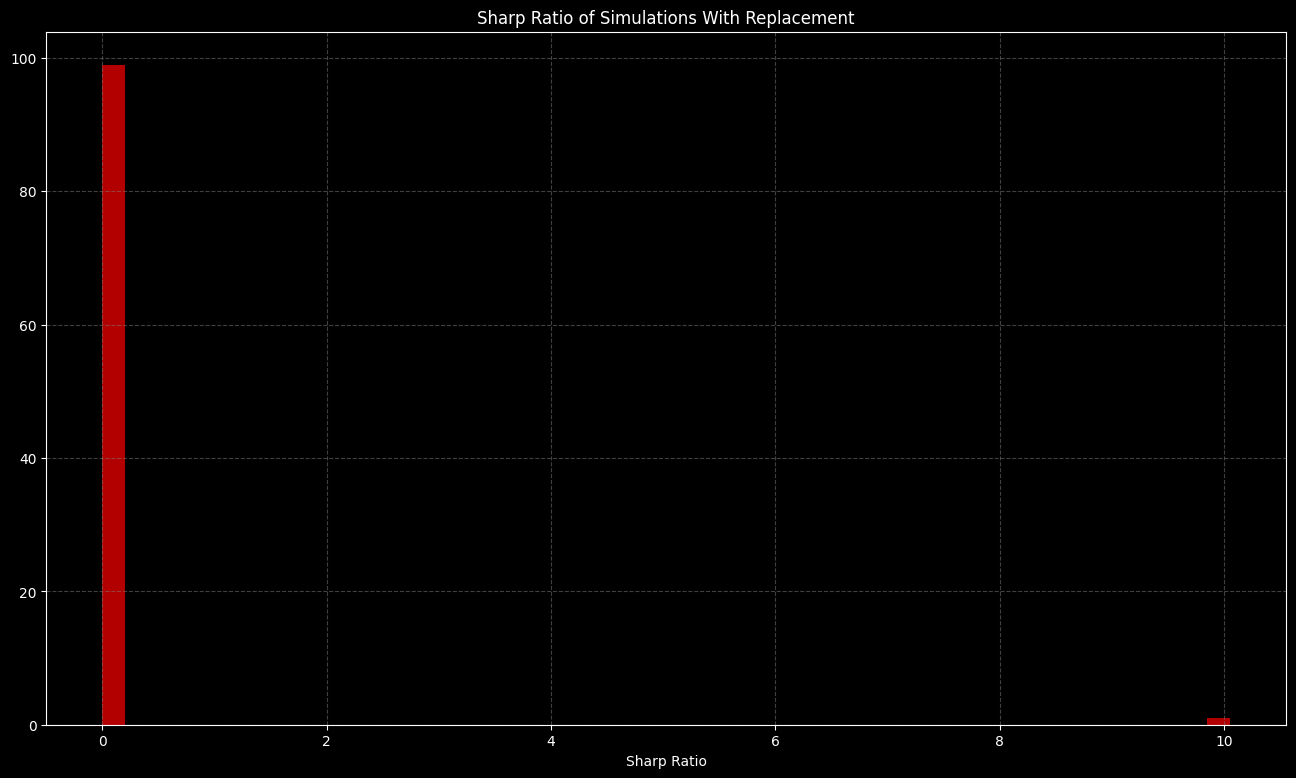

In [15]:
sharp_ratio = SharpRatio("BARC.L")

# Simulate the returns with replacement
simulations_with_replacement = monte_carlo.simulate_with_replacement(100)
cumulative_returns_with_replacement = monte_carlo.calculate_cumulative_returns(simulations_with_replacement)

# Calculate the sharp ratio
sharp_ratios = sharp_ratio.calculate_sharp_ratio(cumulative_returns_with_replacement)
sharp_ratio.plot_sharp_ratio(sharp_ratios, 'Sharp Ratio of Simulations With Replacement')

#### NatWest Group plc

[*********************100%***********************]  1 of 1 completed


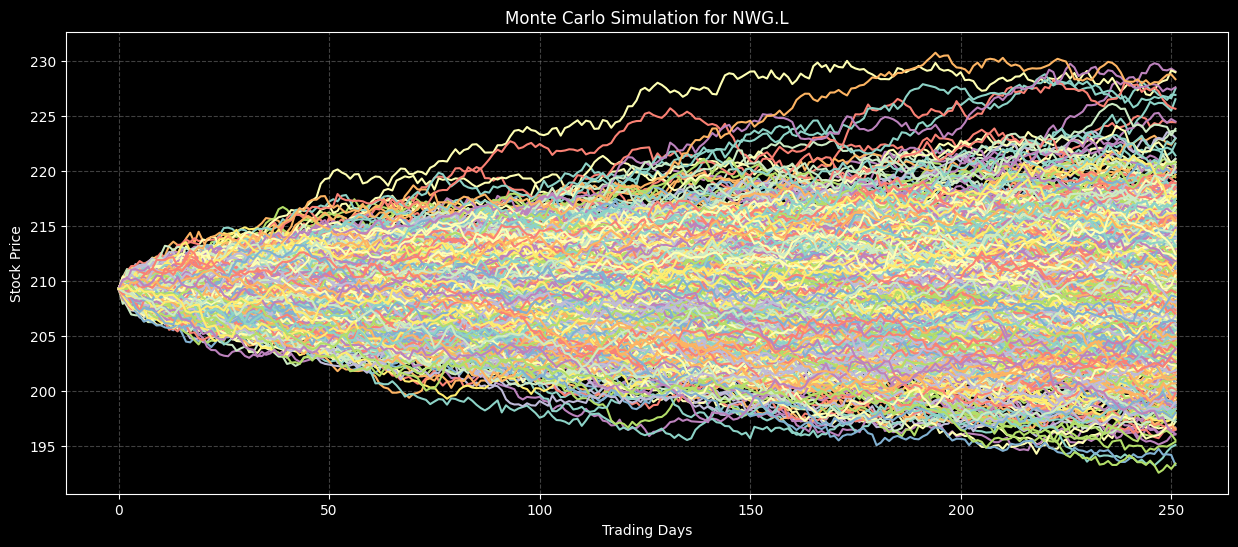

In [16]:
simulator = MonteCarloSimulator('NWG.L', '2020-01-01', '2021-12-31')
simulator.plot_paths(num_paths=1000, num_days=252)

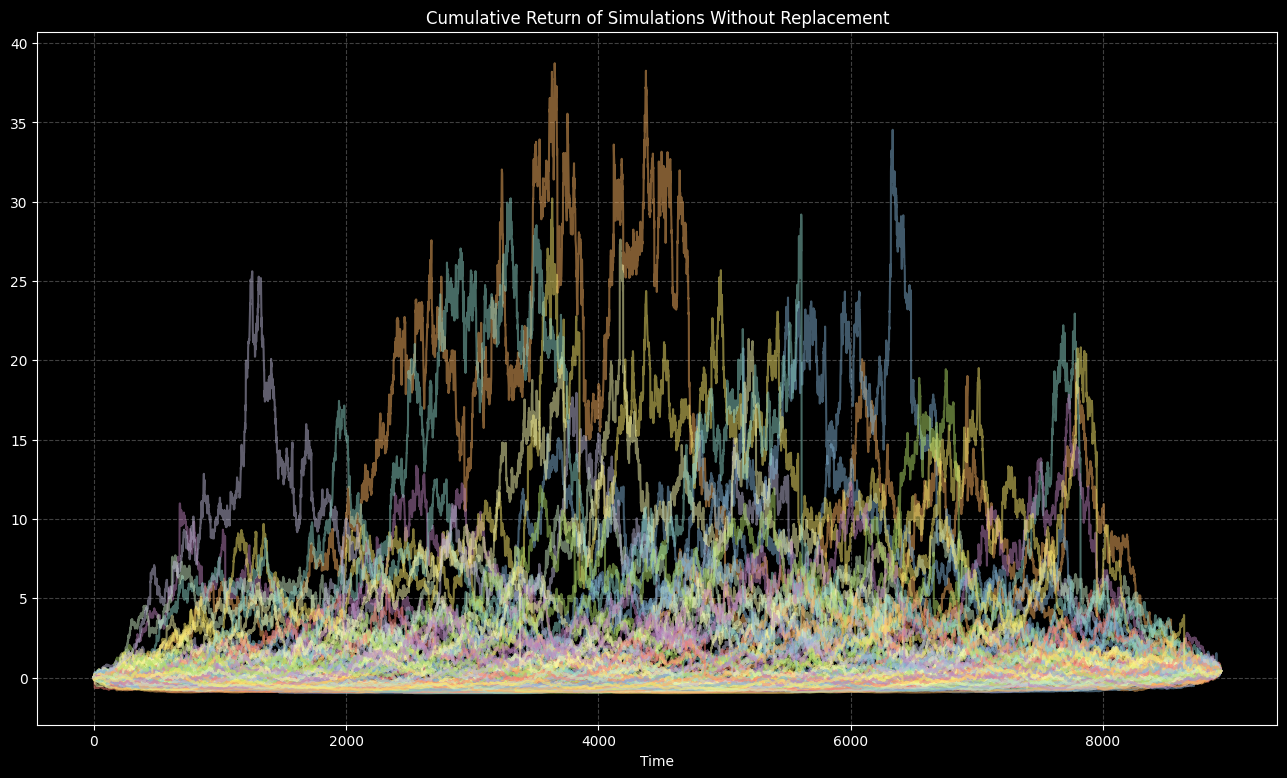

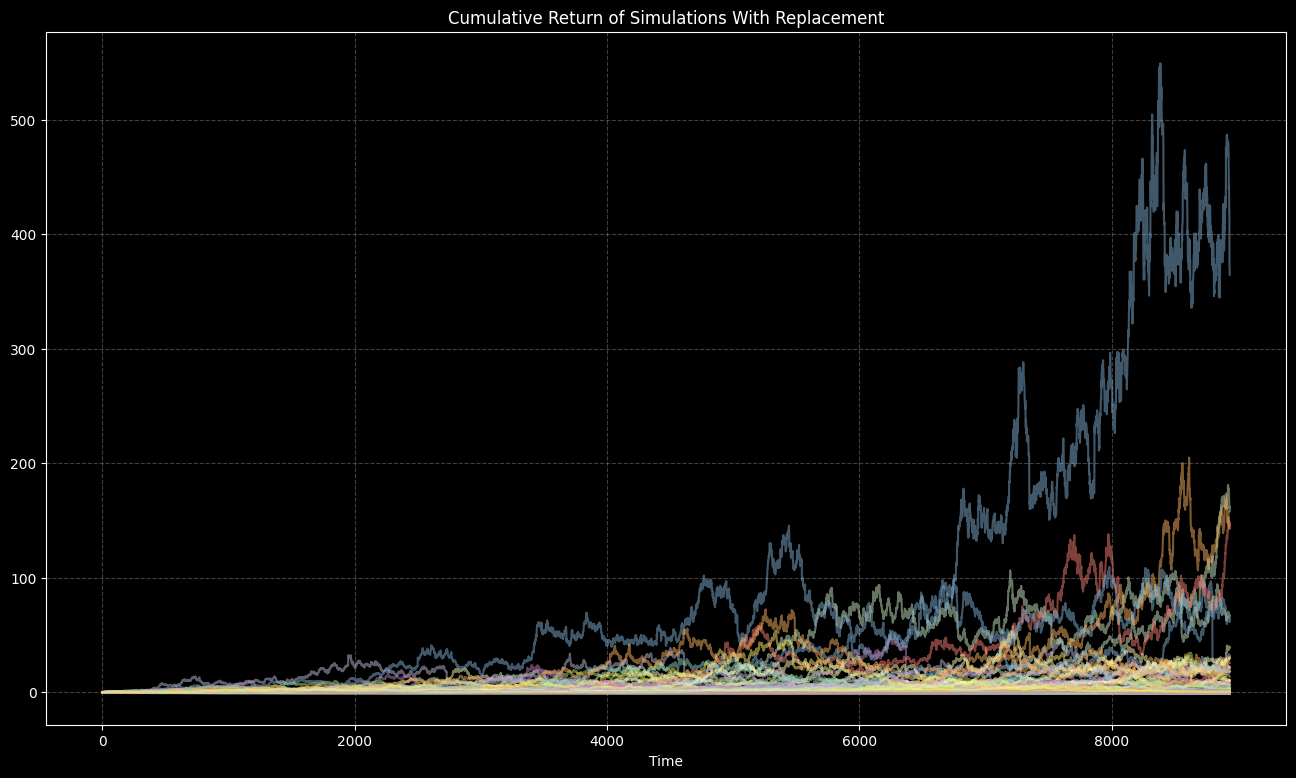

In [17]:
monte_carlo = MonteCarloSimulation("NWG.L")
# Simulate the returns without replacement
simulations_without_replacement = monte_carlo.simulate_without_replacement(100)
cumulative_returns_without_replacement = monte_carlo.calculate_cumulative_returns(simulations_without_replacement)
monte_carlo.plot_cumulative_returns(cumulative_returns_without_replacement, 'Cumulative Return of Simulations Without Replacement')

# Simulate the returns with replacement
simulations_with_replacement = monte_carlo.simulate_with_replacement(100)
cumulative_returns_with_replacement = monte_carlo.calculate_cumulative_returns(simulations_with_replacement)
monte_carlo.plot_cumulative_returns(cumulative_returns_with_replacement, 'Cumulative Return of Simulations With Replacement')

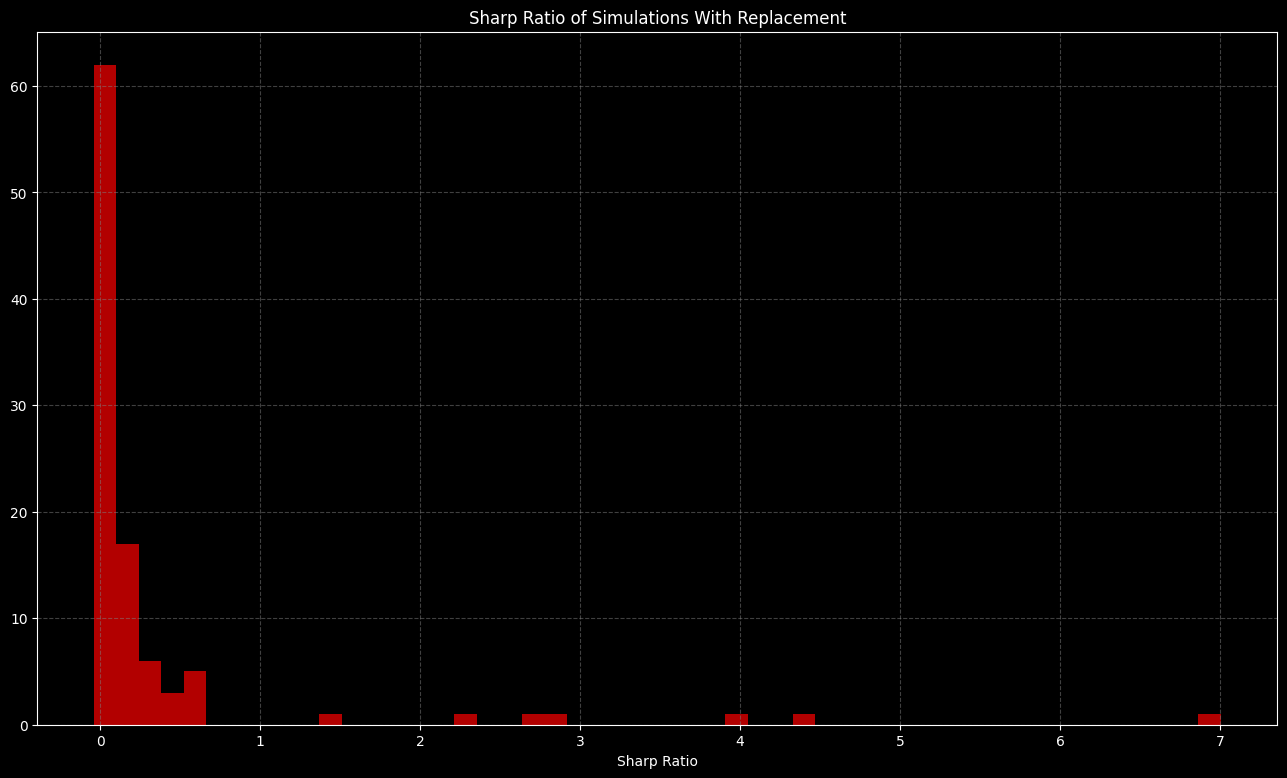

In [18]:
sharp_ratio = SharpRatio("NWG.L")

# Simulate the returns with replacement
simulations_with_replacement = monte_carlo.simulate_with_replacement(100)
cumulative_returns_with_replacement = monte_carlo.calculate_cumulative_returns(simulations_with_replacement)

# Calculate the sharp ratio
sharp_ratios = sharp_ratio.calculate_sharp_ratio(cumulative_returns_with_replacement)

sharp_ratio.plot_sharp_ratio(sharp_ratios, 'Sharp Ratio of Simulations With Replacement')

#### HSBC Holdings Plc

[*********************100%***********************]  1 of 1 completed


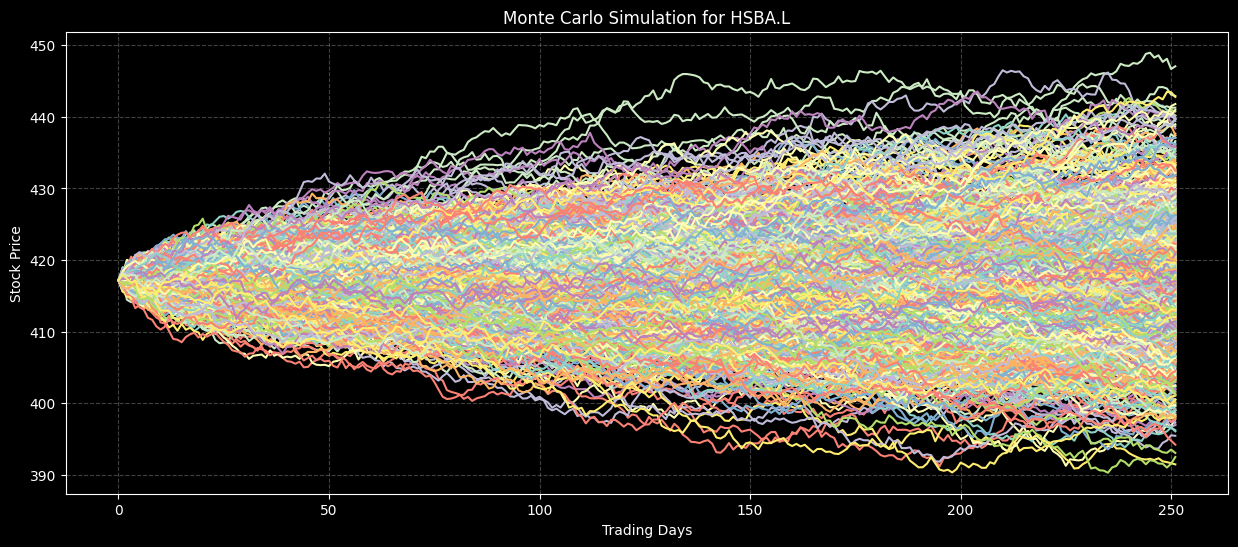

In [19]:
simulator = MonteCarloSimulator('HSBA.L', '2020-01-01', '2021-12-31')
simulator.plot_paths(num_paths=1000, num_days=252)

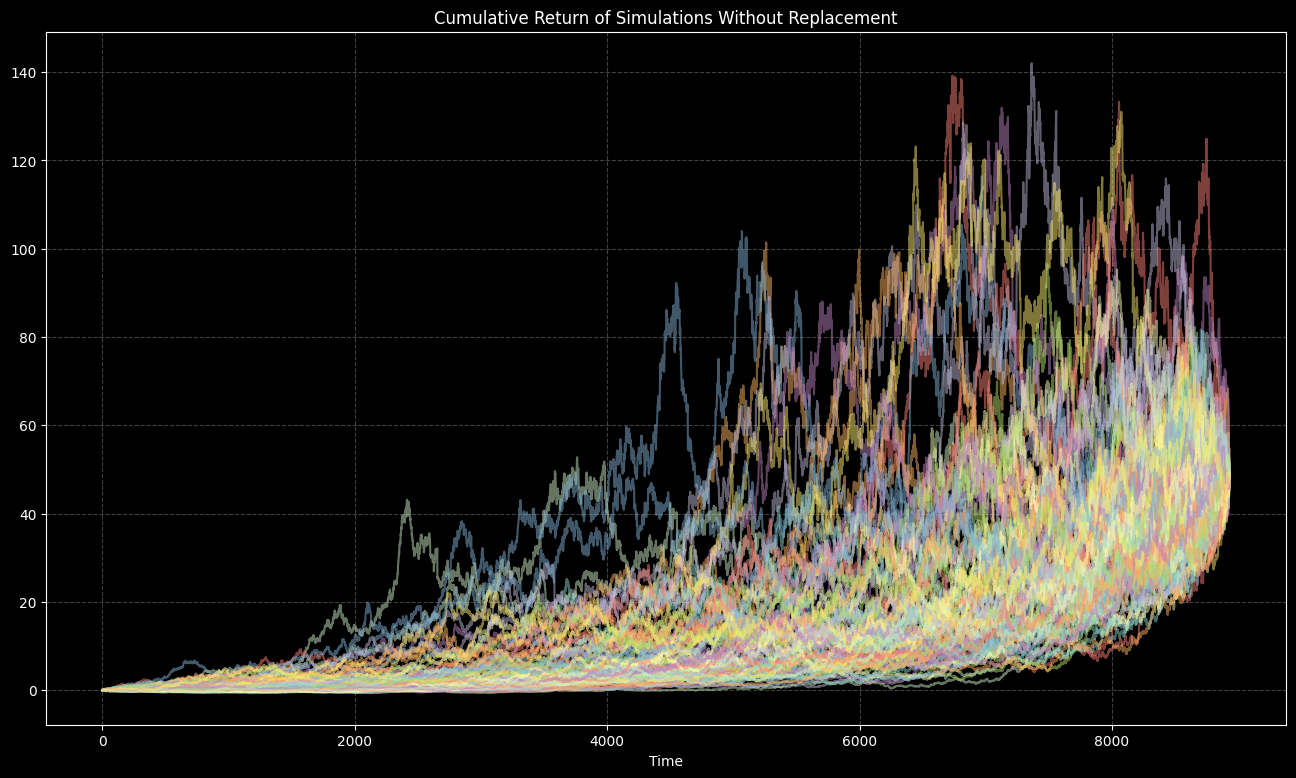

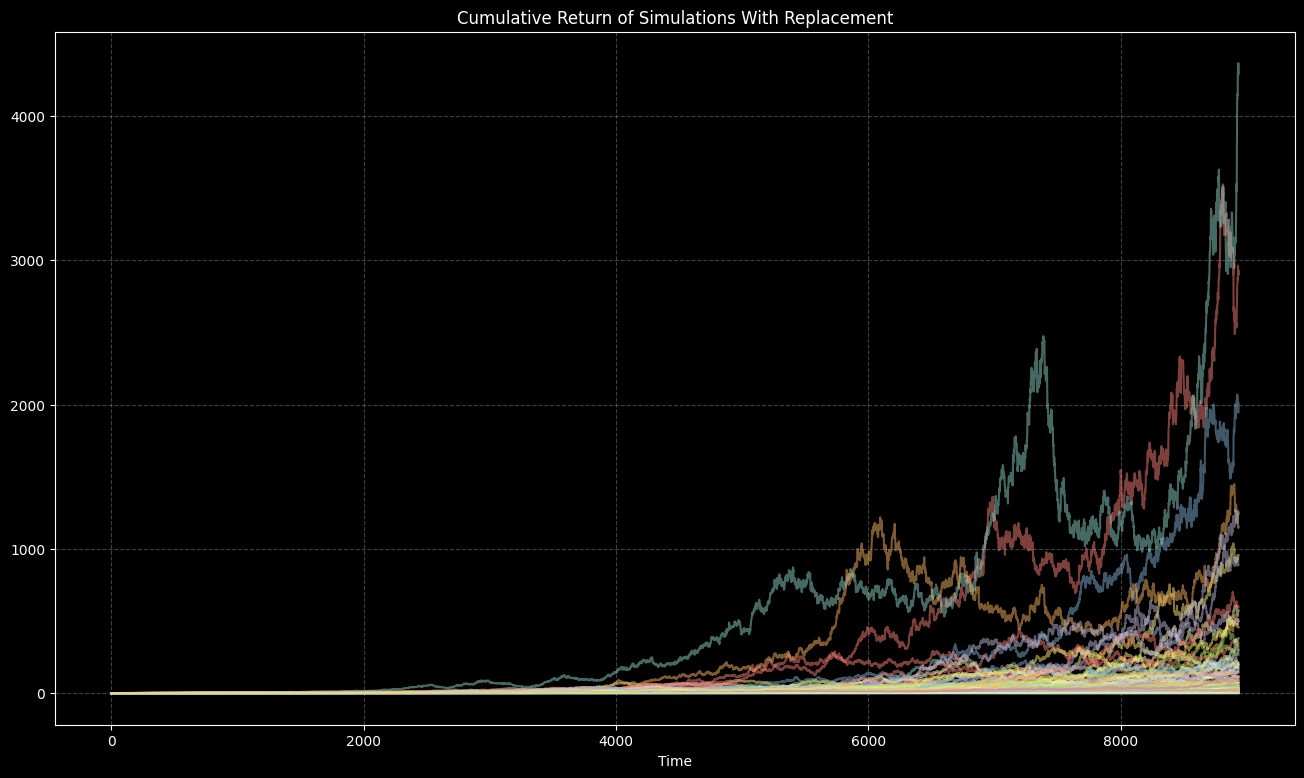

In [20]:
monte_carlo = MonteCarloSimulation("HSBA.L")
# Simulate the returns without replacement
simulations_without_replacement = monte_carlo.simulate_without_replacement(100)
cumulative_returns_without_replacement = monte_carlo.calculate_cumulative_returns(simulations_without_replacement)
monte_carlo.plot_cumulative_returns(cumulative_returns_without_replacement, 'Cumulative Return of Simulations Without Replacement')

# Simulate the returns with replacement
simulations_with_replacement = monte_carlo.simulate_with_replacement(100)
cumulative_returns_with_replacement = monte_carlo.calculate_cumulative_returns(simulations_with_replacement)
monte_carlo.plot_cumulative_returns(cumulative_returns_with_replacement, 'Cumulative Return of Simulations With Replacement')

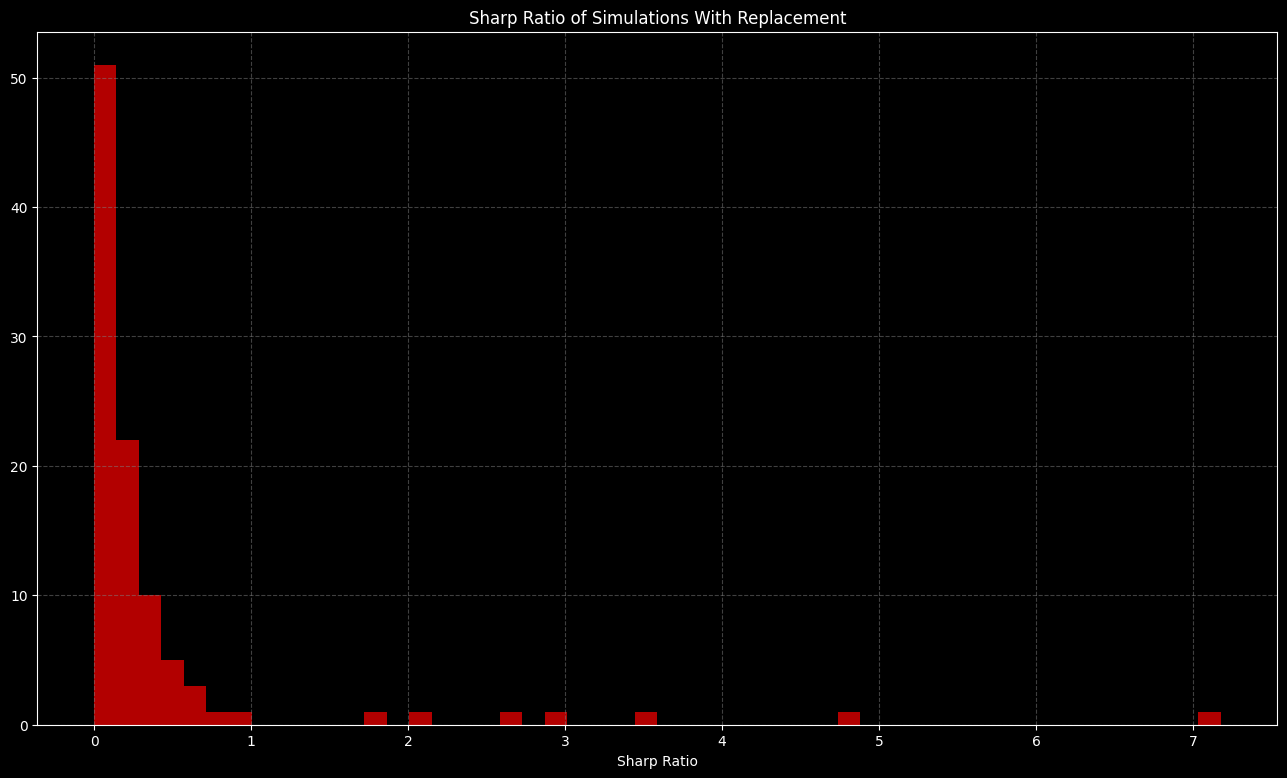

In [21]:
sharp_ratio = SharpRatio("HSBA.L")

# Simulate the returns with replacement
simulations_with_replacement = monte_carlo.simulate_with_replacement(100)
cumulative_returns_with_replacement = monte_carlo.calculate_cumulative_returns(simulations_with_replacement)

# Calculate the sharp ratio
sharp_ratios = sharp_ratio.calculate_sharp_ratio(cumulative_returns_with_replacement)

sharp_ratio.plot_sharp_ratio(sharp_ratios, 'Sharp Ratio of Simulations With Replacement')

#### 2. THE BENCHMARK RETURN OF AN ASSET

In [22]:
index = '^GSPC'
data = yf.download(index, start='2000-01-01', end='2022-12-31')

[*********************100%***********************]  1 of 1 completed


In [23]:
# the benchmark return as the daily return of the index
benchmark_return = data['Close'].pct_change().dropna()
benchmark_return[:10]

Date
2000-01-04   -0.038345
2000-01-05    0.001922
2000-01-06    0.000956
2000-01-07    0.027090
2000-01-10    0.011190
2000-01-11   -0.013063
2000-01-12   -0.004386
2000-01-13    0.012170
2000-01-14    0.010671
2000-01-18   -0.006832
Name: Close, dtype: float64

In [24]:
print(f'Mean Benchmark Return: {np.mean(benchmark_return)}')
print(f'Standard Deviation of Benchmark Return: {np.std(benchmark_return)}')

Mean Benchmark Return: 0.00024604904847256784
Standard Deviation of Benchmark Return: 0.012506062752273206


#### 3. CALCULATING BETA OF U.S COMPANIES

Beta is an important metric used in finance to measure the volatility of an investment relative to a benchmark. A beta of 1 means that an investment's price will move with the market, while a beta less than 1 means it is less volatile than the market, and a beta greater than 1 means it is more volatile.

Beta is important for investors because it helps to identify the level of risk associated with an investment. Higher beta investments are considered riskier because they are more volatile, while lower beta investments are considered to be less risky. By knowing the beta of an investment, an investor can make informed decisions about their portfolio and adjust their investments to meet their risk tolerance and investment goals.

Additionally, beta can be used to help determine the expected returns from an investment. For example, if a stock has a beta of 1.5, it is expected to return 1.5 times the return of the benchmark. This information can be useful for investors when deciding whether to buy, sell, or hold a particular stock.

#### BETA FROM MAXIMUM TIME PERIOD

In [25]:
def calculate_beta_max(ticker, benchmark_ticker):
    stock = yf.Ticker(ticker).history(period="max")
    benchmark = yf.Ticker(benchmark_ticker).history(period="max")
    
    stock_returns = stock['Close'].pct_change().dropna()
    benchmark_returns = benchmark['Close'].pct_change().dropna()
    
    min_len = min(len(stock_returns), len(benchmark_returns))
    stock_returns = stock_returns[-min_len:]
    benchmark_returns = benchmark_returns[-min_len:]
    
    covariance = np.cov(stock_returns, benchmark_returns)[0][1]
    benchmark_variance = np.var(benchmark_returns)
    beta = covariance / benchmark_variance
    
    return beta

In [26]:
beta = calculate_beta_max("AAPL", "^GSPC")

In [27]:
print("The beta of Apple is:", beta)

The beta of Apple is: -0.08787710448664886


In [28]:
beta = calculate_beta_max("TSLA", "^GSPC")

In [29]:
print("The beta of TESLA is:", beta)

The beta of TESLA is: -0.18682571972227885


#### BETA (5Y MONTHLY)

In [30]:
def calculate_beta(ticker, benchmark):
    stock = yf.Ticker(ticker).history(period="5y", interval='1mo')
    benchmark = yf.Ticker(benchmark).history(period="5y", interval='1mo')
    
    stock_returns = stock['Close'].pct_change().dropna()
    benchmark_returns = benchmark['Close'].pct_change().dropna()
    
    covariance = np.cov(stock_returns, benchmark_returns)[0][1]
    benchmark_variance = np.var(benchmark_returns)
    
    beta = covariance / benchmark_variance
    return beta

In [31]:
beta = calculate_beta("AAPL", "^GSPC")

In [32]:
print("The beta of Apple is:", beta)

The beta of Apple is: 1.310163030250572


In [33]:
beta = calculate_beta("TSLA", "^GSPC")

In [34]:
print("The beta of TESLA is:", beta)

The beta of TESLA is: 2.059210021613486


In [37]:
df = pd.read_csv('https://pkgstore.datahub.io/core/s-and-p-500-companies/constituents_csv/data/1beb8c524488247ccb27917bfcb581ec/constituents_csv.csv')
df.tail()

Symbol                Name                  Sector
500    YUM         Yum! Brands  Consumer Discretionary
501   ZBRA  Zebra Technologies  Information Technology
502    ZBH       Zimmer Biomet             Health Care
503   ZION       Zions Bancorp              Financials
504    ZTS              Zoetis             Health Care

#### BETA CORRELATION

In [38]:
df.columns = df.columns.str.lower()
companies = df.symbol.unique()
companies[:20]

array(['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE',
       'AAP', 'AMD', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB',
       'ARE', 'ALGN'], dtype=object)

In [39]:
us_500 = []
ticker = df.symbol.unique()
for i in ticker:
    us_500.append(i)

In [40]:
us_price_data = yf.download(us_500, start="2023-03-13", end="2023-03-20")['Adj Close']
us_price_data.dropna(axis=1, inplace=True)

[*********************100%***********************]  505 of 505 completed

21 Failed downloads:
- NLOK: No timezone found, symbol may be delisted
- PBCT: No timezone found, symbol may be delisted
- INFO: No timezone found, symbol may be delisted
- CERN: No timezone found, symbol may be delisted
- WLTW: No timezone found, symbol may be delisted
- CTXS: No timezone found, symbol may be delisted
- NLSN: No timezone found, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted
- BLL: No timezone found, symbol may be delisted
- ABMD: No data found for this date range, symbol may be delisted
- TWTR: No timezone found, symbol may be delisted
- XLNX: No timezone found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- VIAC: No timezone found, symbol may be delisted
- ANTM: No timezone found, symbol may be delisted
- FBHS: No timezone found, symbol may be delisted
- KSU: No timezone found, symbol may be delisted
- DISCK: No timezone fou

In [41]:
us_price_data.shape

(5, 484)

In [44]:
def calculate_beta_five(ticker, benchmark):
    try:
        stock = yf.Ticker(ticker).history(period="5y", interval='1mo')
        benchmark = yf.Ticker(benchmark).history(period="5y", interval='1mo')

        # Align the dates of stock and benchmark DataFrames
        stock, benchmark = stock.align(benchmark, join='inner', axis=0)

        stock_returns = stock['Close'].pct_change().dropna()
        benchmark_returns = benchmark['Close'].pct_change().dropna()

        covariance = np.cov(stock_returns, benchmark_returns)[0][1]
        benchmark_variance = np.var(benchmark_returns)

        beta = covariance / benchmark_variance
        return beta
    except Exception as e:
        print(f"Error: Invalid ticker symbol - {e}")
        return None


In [45]:
tickers = us_price_data
benchmark = "^GSPC"

i = 1
for ticker in tickers:
    beta = calculate_beta_five(ticker, benchmark)
    print(i, "The beta of " + ticker + " is: " + str(beta))
    i += 1

1 The beta of A is: 1.0622771727256215
2 The beta of AAL is: 1.5605795112565268
3 The beta of AAP is: 1.1420374512405198
4 The beta of AAPL is: 1.310281241657844
5 The beta of ABBV is: 0.5664762822583627
6 The beta of ABC is: 0.5324792979591725
7 The beta of ABT is: 0.66784461177324
8 The beta of ACN is: 1.2647709497113644
9 The beta of ADBE is: 1.3237915311235262
10 The beta of ADI is: 1.1598550508489167
11 The beta of ADM is: 0.810119167189975
12 The beta of ADP is: 0.8375339040376342
13 The beta of ADSK is: 1.561721747992338
14 The beta of AEE is: 0.46476558655193007
15 The beta of AEP is: 0.44936220081754574
16 The beta of AES is: 0.9515724659075184
17 The beta of AFL is: 0.9353398605258021
18 The beta of AIG is: 1.1730947652550368
19 The beta of AIZ is: 0.5424743936789338
20 The beta of AJG is: 0.7227368499404121
21 The beta of AKAM is: 0.8189963162619884
22 The beta of ALB is: 1.5872488203413575
23 The beta of ALGN is: 1.6037841866174296
24 The beta of ALK is: 1.5479055189157003


194 The beta of GOOGL is: 1.1148433258470112
195 The beta of GPC is: 0.9307289525490533
196 The beta of GPN is: 1.0186232156370707
197 The beta of GPS is: 1.9224041000886343
198 The beta of GRMN is: 0.9882320023412675
199 The beta of GS is: 1.4121209951081386
200 The beta of GWW is: 1.2024316653321758
201 The beta of HAL is: 2.1871084567825703
202 The beta of HAS is: 0.7364522064290765
203 The beta of HBAN is: 1.1387517014513449
204 The beta of HBI is: 1.5895366368456043
205 The beta of HCA is: 1.675502811586941
206 The beta of HD is: 0.9454796740259163
207 The beta of HES is: 1.6184171854845566
208 The beta of HIG is: 0.8565189702299211
209 The beta of HII is: 0.6361789437918698
210 The beta of HLT is: 1.2460474195074918
211 The beta of HOLX is: 1.0243210273001226
212 The beta of HON is: 1.0956962274820705
213 The beta of HPE is: 1.297197048176577
214 The beta of HPQ is: 1.0506129334451941
215 The beta of HRL is: 0.16713804934986193
216 The beta of HSIC is: 0.8384459260893288
217 The 

385 The beta of ROP is: 1.0477595978807335
386 The beta of ROST is: 1.0092314037259875
387 The beta of RSG is: 0.6825456934688668
388 The beta of RTX is: 1.0126447131161422
389 The beta of SBAC is: 0.5102675115311287
390 The beta of SBUX is: 0.9499482094101499
391 The beta of SCHW is: 0.889597956383183
392 The beta of SEE is: 1.2761866303854754
393 The beta of SHW is: 1.081904744567419
394 The beta of SIVB is: 1.4394206090368338
395 The beta of SJM is: 0.2107195222040533
396 The beta of SLB is: 1.8157059956868355
397 The beta of SNA is: 1.0949314716473084
398 The beta of SNPS is: 1.2020548029809428
399 The beta of SO is: 0.49925891016742013
400 The beta of SPG is: 1.5975804305911852
401 The beta of SPGI is: 1.128347844525983
402 The beta of SRE is: 0.764428144780152
403 The beta of STE is: 0.8638609593808747
404 The beta of STT is: 1.635729292076635
405 The beta of STX is: 1.179570611684152
406 The beta of STZ is: 1.0469581296245472
407 The beta of SWK is: 1.3319793052884048
408 The be

In [49]:
beta_values = []
for ticker in tickers:
    beta = calculate_beta_five(ticker, benchmark)
    beta_values.append(beta)

INTC: No data found for this date range, symbol may be delisted


In [50]:
tick = tickers.columns
tick

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       ...
       'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION',
       'ZTS'],
      dtype='object', length=484)

In [51]:
df_beta = pd.DataFrame(beta_values)
df_beta['ticker'] = tick

In [52]:
df_beta[:10]

0 ticker
0  1.062281      A
1  1.560659    AAL
2  1.141995    AAP
3  1.310303   AAPL
4  0.566449   ABBV
5  0.532448    ABC
6  0.667717    ABT
7  1.264805    ACN
8  1.323821   ADBE
9  1.159926    ADI

In [53]:
df_beta.rename(columns={df_beta.columns[0]: 'beta'}, inplace=True)

In [54]:
df_beta.sort_values(by='beta', ascending=True, inplace=True)

In [55]:
df_temp1 = df_beta.head(20)
df_temp1

beta ticker
214  0.167118    HRL
58   0.182392   BIIB
113  0.193866   CTRA
394  0.210905    SJM
376  0.234285   REGN
187  0.259562    GIS
92   0.278016    CLX
217  0.309126    HSY
124  0.338806     DG
105  0.349549    CPB
457  0.351221     VZ
98   0.352008    CMS
314  0.354772    NEM
265  0.358526    LLY
145  0.361920     ED
300  0.377466    MRK
462  0.398330    WEC
349  0.401627     PG
137  0.418366    DUK
246  0.425158      K

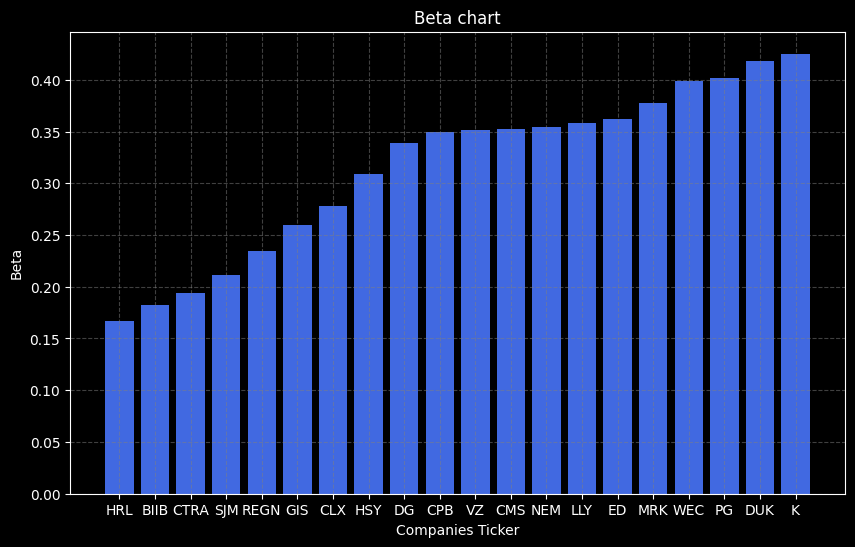

In [56]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(df_temp1.ticker, df_temp1.beta, color="royalblue")
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.xlabel('Companies Ticker')
plt.ylabel('Beta')
plt.title("Beta chart")
plt.show()

In [57]:
df_temp2 = df_beta
df_temp2.tail(20)

beta ticker
28   1.963165    AMD
169  2.023147    FCX
140  2.023588    DXC
159  2.024076   ETSY
167  2.049725   FANG
41   2.051559   APTV
429  2.061595   TSLA
474  2.070961   WYNN
288  2.114409    MGM
367  2.149949    PVH
200  2.186953    HAL
345  2.248634   PENN
79   2.266356    CCL
139  2.425998    DVN
302  2.430579    MRO
373  2.506019    RCL
311  2.537401   NCLH
118  2.934963    CZR
38   3.593690    APA
227       NaN   INTC

In [58]:
df_temp2.sort_values(by='beta', ascending=False, inplace=True)

In [59]:
df_temp2 = df_temp2.head(20)
df_temp2

beta ticker
38   3.593690    APA
118  2.934963    CZR
311  2.537401   NCLH
373  2.506019    RCL
302  2.430579    MRO
139  2.425998    DVN
79   2.266356    CCL
345  2.248634   PENN
200  2.186953    HAL
367  2.149949    PVH
288  2.114409    MGM
474  2.070961   WYNN
429  2.061595   TSLA
41   2.051559   APTV
167  2.049725   FANG
159  2.024076   ETSY
140  2.023588    DXC
169  2.023147    FCX
28   1.963165    AMD
196  1.922405    GPS

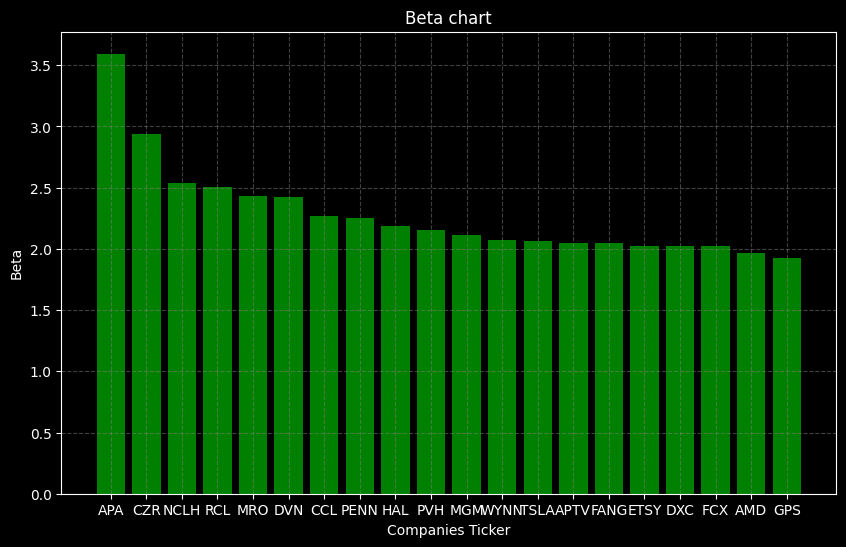

In [60]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(df_temp2.ticker, df_temp2.beta, color="green")
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.xlabel('Companies Ticker')
plt.ylabel('Beta')
plt.title("Beta chart")
plt.show()